In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Understanding the structure of the data

In [3]:
df.shape

(50000, 2)

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Data cleaning

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: >

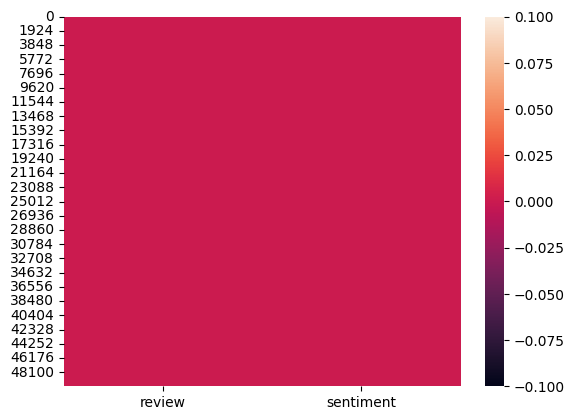

In [7]:
sns.heatmap(df.isnull())

## Check for duplicate data

In [8]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [9]:
#check how many positive and negative reviews are there
df['sentiment'].value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
#check the length of the reviews
df['review'].apply(lambda x:len(x)).describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review, dtype: float64

<Axes: xlabel='sentiment', ylabel='count'>

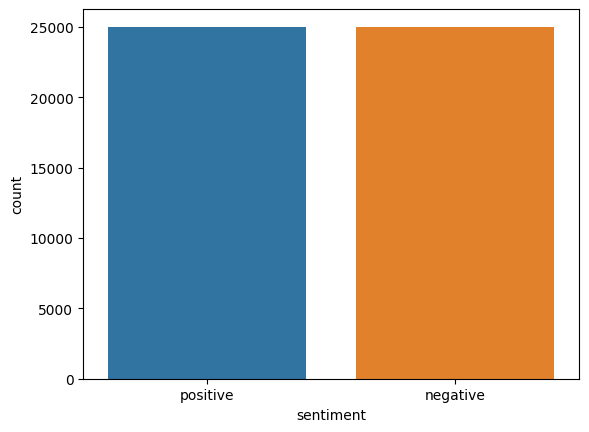

In [11]:
#plot graphs for positive and negative reviews
sns.countplot(x='sentiment',data=df)

In [12]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Conv1D, GlobalMaxPooling1D

In [13]:
dataset = pd.read_csv('IMDB Dataset.csv')
dataset['sentiment'] = dataset['sentiment'].replace({'positive': 1, 'negative': 0})
# sample only 5000 rows randomly (full dataset leads to memory issues)
dataset = dataset.sample(n=5000, random_state=42)
dataset

,review,sentiment
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0
...,...,...
39885,One of eastwood's best movies after he had sep...,1
17566,My blurred childhood memories have kept the ec...,0
16062,I love Zombie-Movies and I love amateur-produc...,0
48445,Chan is in New York and he gets involved with ...,1


In [14]:
##Converting to numpy array
dataset = dataset.to_numpy()
dataset[0]

array(["I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defe

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load and preprocess the dataset
df = pd.read_csv("IMDB Dataset.csv")



In [16]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=200)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()
model.add(Embedding(5000, 128, input_length=200))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64)



625/625 [==============================] - 259s 411ms/step - loss: 0.3776 - accuracy: 0.8321 - val_loss: 0.2993 - val_accuracy: 0.8728


In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

# Make some predictions with test data
preds = model.predict(X_test)
preds = [1 if x>0.5 else 0 for x in preds]
preds[:10]

# Print the actual labels
print(y_test[:10])



Accuracy: 87.279999
313/313 [==============================] - 15s 46ms/step
[1 1 0 1 0 1 1 1 0 0]
